# SSIM

In [ ]:
# from skimage.measure import compare_ssim

'''
compare_ssim(X, Y, win_size=None, gradient=False, 
			 data_range=None, multichannel=False, 
			 gaussian_weights=False, full=False, **kwargs)
			 
-------- Parameters --------
X, Y : ndarray
	   任意维度图像
win_size : int or None
gradient : bool, optional
		   是否返回关于Y的梯度
data_range : float, optional
			 输入图像数据范围(MaxValue), 默认情况根据图像数据类型估计
multichannel : bool, optional
			   if True, 则将数组的最后一个维度视为通道, 
			   对每个通道独立进行相似度计算, 然后取平均值。
gaussian_weights : bool, optional
				   if True, 则每个patch的均值和方差由宽度为 sigma=1.5 的归一化高斯核在空间上加权。
full : bool, optional
	   if True, 返回原图大小的ssim而不是均值ndarray
	   
-------- Other Parameters --------
use_sample_covariance : bool, default=True
						if True, 则通过 N-1 而不是 N 对协方差进行归一化,
						其中 N 是滑动窗口内的像素数。
K1 : float, default=0.01
K2 : float, default=0.03
sigma : float, default=1.5
		gaussian_weights=True 时的 sigma
		
-------- Returns --------
mssim : float
grad : ndarray
	   X 和 Y 之间结构相似指数的梯度。
	   仅在 gradient=True 时返回
S : ndarray
	完整的 ssim 图像
	仅在 full=True 时返回
'''



In [50]:
from skimage.metrics import structural_similarity as ssim
from skimage import io

# img_path1 = "/Users/pengliu/Code/LearnPython3/limingxiu/ssim4face/non-makeup/xfsy_0176.png"
# ima_path2 = "/Users/pengliu/Code/LearnPython3/limingxiu/ssim4face/xfsy_0176/xfsy_0176_vFG45.png"
# ima_path2 = "/Users/pengliu/Code/LearnPython3/limingxiu/ssim4face/xfsy_0176/xfsy_0176_vFG700.png"

img_path1 = "/Users/pengliu/Code/LearnPython3/limingxiu/ssim4face/psgan/result/xfsy_0505/xfsy_0505_vFG160.png"
ima_path2 = "/Users/pengliu/Code/LearnPython3/limingxiu/ssim4face/non-makeup/xfsy_0505.png"
# 读取两张图片
img1 = io.imread(img_path1)
img2 = io.imread(ima_path2)
print(img1.shape)

r1 = img1[:, :, 0]
g1 = img1[:, :, 1]
b1 = img1[:, :, 2]

r2 = img2[:, :, 0]
g2 = img2[:, :, 1]
b2 = img2[:, :, 2]
print(r1.shape)
print(r2.shape)
# 计算 SSIM 值
ssim_val_r = ssim(r1, r2, win_size=7, multichannel=True)
ssim_val_g = ssim(g1, g2, win_size=7, multichannel=True)
ssim_val_b = ssim(b1, b2, win_size=7, multichannel=True)

print("SSIM value r:", ssim_val_r)
print("SSIM value g:", ssim_val_g)
print("SSIM value b:", ssim_val_b)

avg = (ssim_val_r + ssim_val_g + ssim_val_b) / 3.0
print("Average SSIM value:", avg)


(353, 353, 3)
(353, 353)
(361, 361)


ValueError: Input images must have the same dimensions.

In [31]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error


img = img_as_float(data.camera())
print(type(data.camera()))
print((data.camera()).shape)

<class 'numpy.ndarray'>
(512, 512)


img, img<function structural_similarity at 0x12f09fe50>
img, img_noise<function structural_similarity at 0x12f09fe50>
img, img_const<function structural_similarity at 0x12f09fe50>


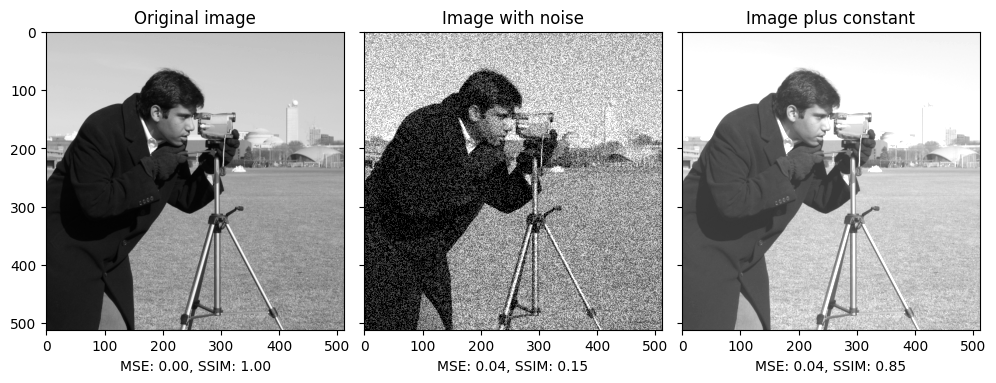

In [29]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error


img = img_as_float(data.camera())
print(type(data.camera()))

rows, cols = img.shape

noise = np.ones_like(img) * 0.2 * (img.max() - img.min())
rng = np.random.default_rng()
noise[rng.random(size=noise.shape) > 0.5] *= -1

img_noise = img + noise
img_const = img + abs(noise)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4),
                         sharex=True, sharey=True)
ax = axes.ravel()

mse_none = mean_squared_error(img, img)
ssim_none = ssim(img, img, data_range=img.max() - img.min())
print("img, img" + str(ssim))
mse_noise = mean_squared_error(img, img_noise)
ssim_noise = ssim(img, img_noise,
                  data_range=img_noise.max() - img_noise.min())
print("img, img_noise" + str(ssim))
mse_const = mean_squared_error(img, img_const)
ssim_const = ssim(img, img_const,
                  data_range=img_const.max() - img_const.min())
print("img, img_const" + str(ssim))
ax[0].imshow(img, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[0].set_xlabel(f'MSE: {mse_none:.2f}, SSIM: {ssim_none:.2f}')
ax[0].set_title('Original image')

ax[1].imshow(img_noise, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[1].set_xlabel(f'MSE: {mse_noise:.2f}, SSIM: {ssim_noise:.2f}')
ax[1].set_title('Image with noise')

ax[2].imshow(img_const, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[2].set_xlabel(f'MSE: {mse_const:.2f}, SSIM: {ssim_const:.2f}')
ax[2].set_title('Image plus constant')

plt.tight_layout()
plt.show()

In [20]:
# pip install Pillow
# from skimage.measure import compare_ssim
from skimage.metrics import structural_similarity as SSIM
from PIL import Image
import numpy as np

img_path1 = "/Users/pengliu/Code/LearnPython3/limingxiu/ssim4face/non-makeup/xfsy_0176.png"
ima_path2 = "/Users/pengliu/Code/LearnPython3/limingxiu/ssim4face/xfsy_0176/xfsy_0176_vFG45.png"

def get_image(img_path : str) -> np.ndarray:
    # 使用 Pillow 打开图片
    img_pil = Image.open(img_path)
    # 将图片转换为 ndarray 数据格式
    img_ndarray = np.array(img_pil)
    return img_ndarray
    
# ssim = compare_ssim(get_image(img_path1), get_image(ima_path2), win_size=11, data_range=255, multichannel=True)
# ssim = structural_similarity(get_image(img_path1), get_image(ima_path2), win_size=7, data_range=255, multichannel=True)
# ssim = SSIM(get_image(img_path1), get_image(ima_path2), win_size=11, data_range=255, channel_axis=1, multichannel=True)
ssim = SSIM(get_image(img_path1), get_image(ima_path2), win_size=11, multichannel=True)
print(ssim)

ValueError: win_size exceeds image extent. Either ensure that your images are at least 7x7; or pass win_size explicitly in the function call, with an odd value less than or equal to the smaller side of your images. If your images are multichannel (with color channels), set channel_axis to the axis number corresponding to the channels.